<a href="https://colab.research.google.com/github/Sundragon1993/deep_ul_berkeley_cs294/blob/main/Opera_CS294_158_Homework_1_Autoregressive_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting Started

## Overview
This semester, all homeworks will be conducted through Google Colab notebooks. All code for the homework assignment will be written and run in this notebook. Running in Colab will automatically provide a GPU, but you may also run this notebook locally by following [these instructions](https://research.google.com/colaboratory/local-runtimes.html) if you wish to use your own GPU.

You will save images in the notebooks to use and fill out a given LaTeX template which will be submitted to Gradescope, along with your notebook code.

## Using Colab
On the left-hand side, you can click the different icons to see a Table of Contents of the assignment, as well as local files accessible through the notebook.

Make sure to go to **Runtime -> Change runtime type** and select **GPU** as the hardware accelerator. This allows you to use a GPU. Run the cells below to get started on the assignment. Note that a session is open for a maximum of 12 hours, and using too much GPU compute may result in restricted access for a short period of time. Please start the homework early so you have ample time to work.

**If you loaded this notebook from clicking "Open in Colab" from github, you will need to save it to your own Google Drive to keep your work.**

## General Tips
In each homework problem, you will implement an autoregressive model and run it on two datasets (dataset 1 and dataset 2). The expected outputs for dataset 1 are already provided to help as a sanity check.

Feel free to print whatever output (e.g. debugging code, training code, etc) you want, as the graded submission will be the submitted pdf with images.

After you complete the assignment, download all of the image outputted in the results/ folder and upload them to the figure folder in the given latex template.

Run the cells below to download and load up the starter code.

In [ ]:
!if [ -d deepul ]; then rm -Rf deepul; fi
!git clone https://github.com/rll/deepul.git 
!unzip -qq deepul/homeworks/hw1/data/hw1_data.zip -d deepul/homeworks/hw1/data/
!pip install ./deepul

Cloning into 'deepul'...
remote: Enumerating objects: 758, done.
remote: Total 758 (delta 0), reused 0 (delta 0), pack-reused 758
Receiving objects: 100% (758/758), 118.40 MiB | 30.82 MiB/s, done.
Resolving deltas: 100% (347/347), done.
Processing ./deepul
  Created wheel for deepul: filename=deepul-0.1.0-cp37-none-any.whl size=16678 sha256=8794f515def25565a9a1560cf11319df4dd9b47094159090c36b0a7101c82eb6
  Stored in directory: /tmp/pip-ephem-wheel-cache-wckh3j27/wheels/39/1a/4b/a6f51db275abb2e5dae32540e06ed5011e792f162467bd3aa8
Successfully built deepul


In [ ]:
from deepul.hw1_helper import *

In [ ]:
%load_ext autoreload
%autoreload 2

# Question 1: 1D Data

In this question, we will train simple generative models on discrete 1D data.

Execute the cell below to visualize our datasets

In [ ]:
train_data, test_data = q1_sample_data_1()
print(f'shape',test_data)

shape [11 10  8  7 10  9  9  8  5  8  7  9 10  7  9 11  7 11  6  8  8  8  7  7
  7  9  9 12 11  7  9 10  8  8  8 10  6  7  9  9  9  7 10 12  9  8 10  7
  7  8  3  6  7  6  6  7  5  7  7  8 10  8  8  8  9  6  8  9  5 10 10  7
  8  6  9  6  8  6  8  5 11  6  8  8  7  6 10  7  9  7  7  9 10  8  5 12
  6  5 13  7  5  7  9  8  6 12  7  6 10 11  7  5 10  4  6 10  8  8  9  8
  6 11 11  8  8 13  8  8  9 11 11  8  9  5  8  7  6 11  7  7  9 11  9 13
  8  9  9 11  9  8  6  9 11  7  9  9 10  7 13  6  7 10  9 10  7  8  8 11
  9 10  7 10  9 11 12  8  7  6  8  7  9  8  7 10  6  9  7  9 11  8  9  8
  7  9  9  9  8  8  6  7]


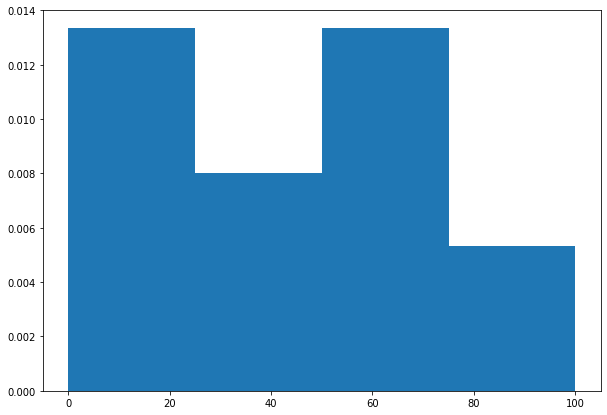

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
  
  
# Creating dataset
a = np.array([22, 87, 5, 43, 56, 
              73, 55, 54, 11,
              20, 51, 5, 79, 31,
              27])
  
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = [0, 25, 50, 75, 100],density=True)
'''
Each bin will display the bin's raw count divided by the total number of counts and the bin width 
(density = counts / (sum(counts) * np.diff(bins))), 
so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).
'''
# Show plot
plt.show()

Dataset 1


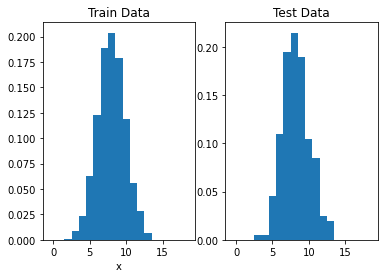

Dataset 2


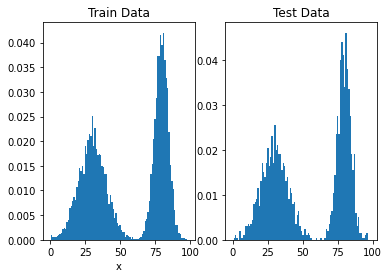

In [ ]:
visualize_q1_data(dset_type=1)
visualize_q1_data(dset_type=2)

## Part (a) Fitting a Histogram

Let $\theta = (\theta_0, \dots, \theta_{d-1}) \in \mathbb{R}^d$ and define the model $p_\theta(x) = \frac{e^{\theta_x}}{\sum_{x'}e^{\theta_{x'}}}$

Fit $p_\theta$ with maximum likelihood via stochastic gradient descent on the training set, using $\theta$ initialized to zero. Use your favorite version of stochastic gradient descent, and optimize your hyperparameters on a validation set of your choice.

**You will provide these deliverables**


1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. Plot the model probabilities in a bar graph with $\{0,\dots,d-1\}$ on the x-axis and a real number in $[0,1]$ on the y-axis.




### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
import torch
import torch.optim as optim
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

quiet = True

In [ ]:
def train(model, train_loader,optimizer):
  model.train()
  loss_history = []
  for x in train_loader:
    x = x.cuda().contiguous()
    loss = model.negative_log_likelihood(x)
    optimizer.zero_grad()
    loss.backward()
    loss_history.append(loss.item())
    optimizer.step()
    
  return loss_history


In [ ]:
def eval_loss(model, data_loader):
    model.eval()
    sum_loss =0
    with torch.no_grad():
        for x in data_loader:
            # print('Type of x before transforming:',x.dtype)
            x = x.cuda().contiguous()
            # print('Type of x:',x.dtype)
            test_loss = model.negative_log_likelihood(x)
            sum_loss += x.shape[0] * test_loss  # Why???
        avg_loss = sum_loss / len(data_loader.dataset)

    return avg_loss.item()



def train_solver(model, train_loader, test_loader, train_args):
    learning_rate, epochs = train_args['lr'], train_args['epochs']
    # print(model.parameters())
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    train_losses = []
    test_losses = [eval_loss(model, test_loader)]
    for epoch in range(epochs):
        model.train()
        '''
        append: Appends object at the end.
        x = [1, 2, 3]
        x.append([4, 5])
        print (x)
        gives you: [1, 2, 3, [4, 5]]

        extend: Extends list by appending elements from the iterable.
        x = [1, 2, 3]
        x.extend([4, 5])
        print (x)
        gives you: [1, 2, 3, 4, 5]
        '''
        train_losses.extend(train(model, train_loader, optimizer))
        test_loss = eval_loss(model, test_loader)
        test_losses.append(test_loss)
        if not quiet:
          print(f'Epoch {epoch}, Test loss {test_loss:.4f}')

    return train_losses, test_losses


In [ ]:
class Histogram(nn.Module):
  def __init__(self,d):
    super().__init__()
    self.d = d # Number of bins
    self.logits = nn.Parameter(torch.zeros(d),requires_grad = True)
  
  #compute loss as log likelihood
  def negative_log_likelihood(self,x):
    # X is batch size 128
    # 
    # print('Debug x shape in loss function',x.shape)
    # input to the cross_entropy (Logits) should be (minibatch,d)
    logits = self.logits.unsqueeze(0).repeat(x.shape[0],1)
    # print('Debug self.logits shape in loss function',logits.shape)
    # print('DEBUG in Histogram: x: {}, logits:{}'.format(x[0],F.softmax(logits[0])))
    return F.cross_entropy(logits,x.long())
  def get_distribution(self):
    #output of softmax is probabilities
    return F.softmax(self.logits,dim=0).cpu().detach().numpy()


In [ ]:
def q1_a(train_data, test_data, d, dset_id):
  """
  train_data: An (n_train,) numpy array of integers in {0, ..., d-1}
  test_data: An (n_test,) numpy array of integers in {0, .., d-1}
  d: The number of possible discrete values for random variable x
  dset_id: An identifying number of which dataset is given (1 or 2). Most likely
             used to set different hyperparameters for different datasets

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a numpy array of size (d,) of model probabilities
  """
  hist_model = Histogram(d).cuda()
  train_loader = data.DataLoader(train_data, batch_size=128, shuffle=True)
  test_loader = data.DataLoader(test_data,batch_size=128)
  train_losses, test_losses = train_solver(hist_model,train_loader,test_loader,dict(epochs=20,lr=0.1))
  print(len(train_losses))
  learned_distribution = hist_model.get_distribution()

  return train_losses, test_losses, learned_distribution
  """ YOUR CODE HERE """

### Results

Once you've implemented `q1_a`, execute the cells below to visualize and save your results



In [ ]:
input = torch.randn(3, 5)
target = torch.empty(3, dtype=torch.long).random_(5)
k=input.unsqueeze(0)
print('Input shape: {}, target shape: {}'.format(k.shape,target.shape))

Input shape: torch.Size([1, 3, 5]), target shape: torch.Size([3])


140
Final Test Loss: 2.0529


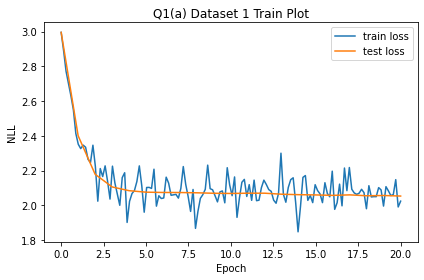

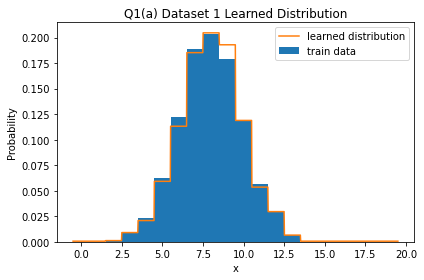

In [ ]:
q1_save_results(1, 'a', q1_a)

1260
Final Test Loss: 4.0467


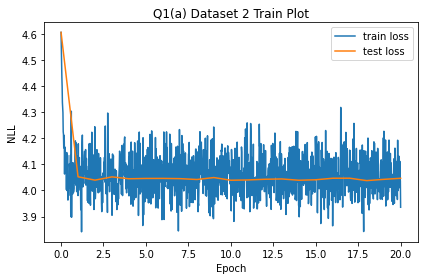

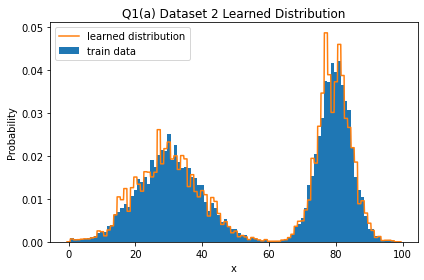

In [ ]:
# torch.cuda.empty_cache()
q1_save_results(2, 'a', q1_a)

## Part (b) Fitting Discretized Mixture of Logistics

Let us model $p_\theta(x)$ as a **discretized** mixture of 4 logistics such that $p_\theta(x) = \sum_{i=1}^4 \pi_i[\sigma((x+0.5 - \mu_i)/s_i) - \sigma((x-0.5-\mu_i)/s_i)]$

For the edge case of when $x = 0$, we replace $x-0.5$ by $-\infty$, and for $x = d-1$, we replace $x+0.5$ by $\infty$.

You may find the [PixelCNN++](https://arxiv.org/abs/1701.05517) helpful for more information on discretized mixture of logistics.

**Provide the same set of corresponding deliverables as part (a)**

### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
n_mix = 4
test = torch.arange(n_mix).float() / (n_mix - 1) * 20
print(test)

tensor([ 0.0000,  6.6667, 13.3333, 20.0000])


In [ ]:
class MixtureOfLogistics(nn.Module):
  def __init__(self, d, n_mix=4):
    super().__init__()
    self.d = d
    self.n_mix = n_mix

    self.logits = nn.Parameter(torch.zeros(n_mix), requires_grad=True)
    self.means = nn.Parameter(torch.arange(n_mix).float() / (n_mix - 1) * d, 
                              requires_grad=True)
    self.log_scales = nn.Parameter(torch.randn(n_mix), requires_grad=True)

  def forward(self, x):
    d = self.d
    x = x.float()
    x = x.unsqueeze(1).repeat(1, self.n_mix) # b x n_mix
    means, log_scales = self.means.unsqueeze(0), self.log_scales.unsqueeze(0) # 1 x n_mix
    inv_scales = torch.exp(-log_scales)

    plus_in = inv_scales * (x + 0.5 - means)
    min_in = inv_scales * (x - 0.5 - means)

    cdf_plus = torch.sigmoid(plus_in) # CDF of logistics at x + 0.5
    cdf_min = torch.sigmoid(min_in) # CDF of logistics at x - 0.5

    cdf_delta = cdf_plus - cdf_min # probability of x in bin [x - 0.5, x + 0.5]
    # log_cdf_delta probability for all other cases 
    log_cdf_delta = torch.log(torch.clamp(cdf_delta, min=1e-12))
    ## log_cdf_plus log probability for edge case of 0 (before scaling)
    log_cdf_plus = torch.log(torch.clamp(torch.sigmoid(inv_scales * (0.5 - means)),
                                                       min=1e-12))  
    # log_cdf_min log probability for edge case of 255 (before scaling) 
    log_cdf_min = torch.log(torch.clamp(1 - torch.sigmoid(inv_scales * (d - 1.5 - means)),
                                        min=1e-12))

    x_log_probs = torch.where(x < 0.001, log_cdf_plus,
                              torch.where(x > d - 1 - 1e-3,
                                          log_cdf_min, log_cdf_delta))
    
    pi_log_probs = F.log_softmax(self.logits, dim=0).unsqueeze(0)
    log_probs = x_log_probs + pi_log_probs
    return torch.logsumexp(log_probs, dim=1)

  def negative_log_likelihood(self, x):
    return -torch.mean(self(x))

  def get_distribution(self):
    with torch.no_grad():
      x = torch.FloatTensor(np.arange(self.d)).cuda()
      distribution = self(x).exp()
    return distribution.detach().cpu().numpy()


In [ ]:
def q1_b(train_data, test_data, d, dset_id):
  """
  train_data: An (n_train,) numpy array of integers in {0, ..., d-1}
  test_data: An (n_test,) numpy array of integers in {0, .., d-1}
  d: The number of possible discrete values for random variable x
  dset_id: An identifying number of which dataset is given (1 or 2). Most likely
           used to set different hyperparameters for different datasets

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a numpy array of size (d,) of model probabilities
  """
  
  model = MixtureOfLogistics(d, n_mix=4).cuda()
  train_loader = data.DataLoader(train_data, batch_size=128, shuffle=True)
  test_loader = data.DataLoader(test_data, batch_size=128)
  train_losses, test_losses = train_solver(model, train_loader, test_loader, 
                                           dict(epochs=10, lr=1e-1))
  distribution = model.get_distribution()

  return train_losses, test_losses, distribution

### Results

Once you've implemented `q1_b`, execute the cells below to visualize and save your results



Final Test Loss: 2.0631


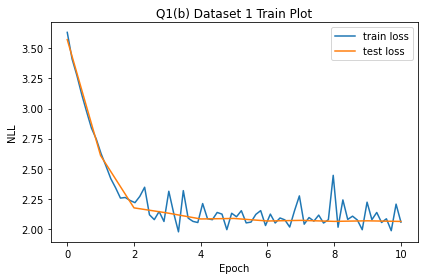

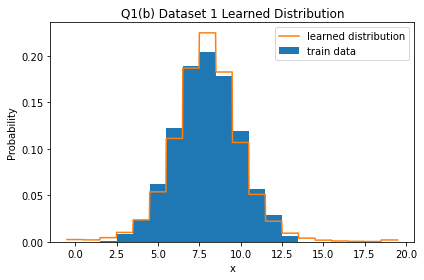

In [ ]:
q1_save_results(1, 'b', q1_b)

Final Test Loss: 4.0386


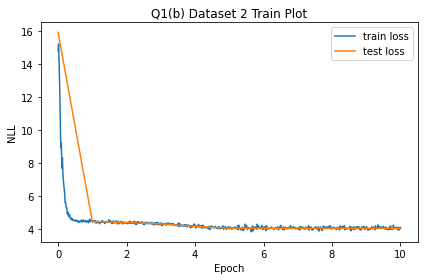

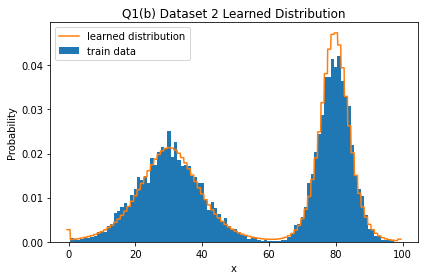

In [ ]:
q1_save_results(2, 'b', q1_b)

# Question 2: MADE

In this question, you will implement [MADE](https://arxiv.org/abs/1502.03509). In the first part, you will use MADE to model a simple 2D joint distribution, and in the second half, you will train MADE on image datasets.

## Part (a) Fitting 2D Data

First, you will work with bivariate data of the form $x = (x_0,x_1)$, where $x_0, x_1 \in \{0, \dots, d\}$. We can easily visualize a 2D dataset by plotting a 2D histogram. Run the cell below to visualize our datasets.

Dataset 1


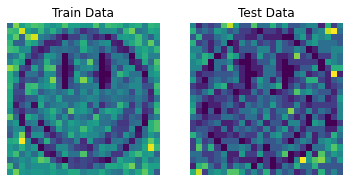

Dataset 2


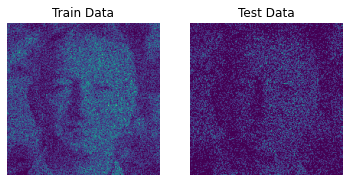

In [ ]:
visualize_q2a_data(dset_type=1)
visualize_q2a_data(dset_type=2)

Implement and train a MADE model through maximum likelihood to represent $p(x_0, x_1)$ on the given datasets, with any autoregressive ordering of your choosing. 

A few notes:
* You do not need to do training with multiple masks
* You made find it useful to one-hot encode your inputs. 

**You will provide these deliverables**


1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. Visualize the learned 2D distribution by plotting a 2D heatmap


### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

def to_one_hot(labels, d):
  one_hot = torch.FloatTensor(labels.shape[0], d).cuda()
  one_hot.zero_()
  one_hot.scatter_(1, labels.unsqueeze(1), 1)
  return one_hot

In [ ]:
class MaskedLinear(nn.Linear):
  # def __init__(self,in_features,out_features, bias=True):
  #   super.__init__(in_features, out_features, bias)
  #   '''
  #    If you have parameters in your model, which should be saved and restored in the state_dict, 
  #    but not trained by the optimizer, you should register them as buffers.
  #    Buffers won’t be returned in model.parameters(), so that the optimizer won’t have a change to update them.
  #   '''
  #   self.register_buffer('mask',torch.ones(out_features, in_features))
  def __init__(self, in_features, out_features, bias=True):
    super().__init__(in_features, out_features, bias)
    self.register_buffer('mask', torch.ones(out_features, in_features))
    
  def set_mask(self,mask):
    self.mask.data.copy_(torch.from_numpy(mask.astype(np.uint8).T))

  def forward(self,input):
    return F.linear(input, self.weight*self.mask, self.bias)


In [ ]:
def q2_a(train_data, test_data, d, dset_id):
  """
  train_data: An (n_train, 2) numpy array of integers in {0, ..., d-1}
  test_data: An (n_test, 2) numpy array of integers in {0, .., d-1}
  d: The number of possible discrete values for each random variable x1 and x2
  dset_id: An identifying number of which dataset is given (1 or 2). Most likely
           used to set different hyperparameters for different datasets

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a numpy array of size (d, d) of probabilities (the learned joint distribution)
  """
  
  model = MADE((2,), d, hidden_size=[100, 100], one_hot_input=True).cuda()
  print(model)
  # print('DEBUG train data:',train_data[:20])
  train_loader = data.DataLoader(train_data, batch_size=128, shuffle=True)
  test_loader = data.DataLoader(test_data, batch_size=128)
  train_losses, test_losses = train_solver(model, train_loader, test_loader, 
                                           dict(epochs=20, lr=2e-3))
  distribution = model.get_distribution()

  return train_losses, test_losses, distribution

### Results

Once you've implemented `q2_a`, execute the cells below to visualize and save your results



In [ ]:
# loss = nn.CrossEntropyLoss()
# input = torch.eye(3,requires_grad=True)
# target = torch.ones(3, dtype=torch.long)
# output = loss(input, target)
# output.backward()
# print(output)

[50, 100, 100, 50]
MADE(
  (net): Sequential(
    (0): MaskedLinear(in_features=50, out_features=100, bias=True)
    (1): ReLU()
    (2): MaskedLinear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): MaskedLinear(in_features=100, out_features=50, bias=True)
  )
)
DEBUG train data: [[ 2  1]
 [ 6  4]
 [17  8]
 [14 22]
 [14 20]
 [ 2 21]
 [17 12]
 [ 4 21]
 [18  1]
 [10 11]
 [ 9 18]
 [22  1]
 [19 20]
 [10 24]
 [15  6]
 [17 24]
 [ 6  0]
 [11  2]
 [14 15]
 [13 22]]
Final Test Loss: 3.1879


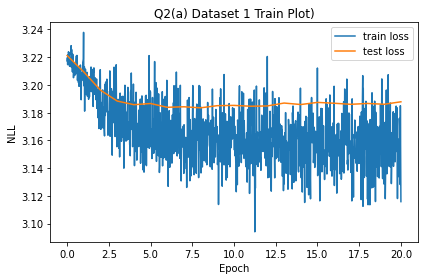

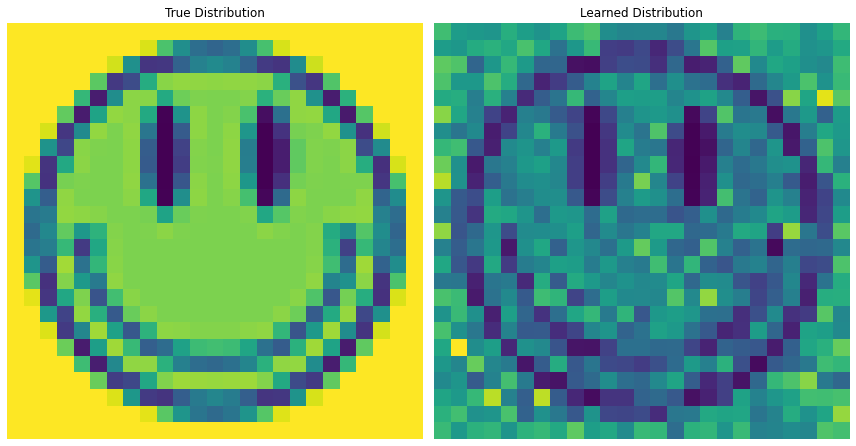

In [ ]:
q2_save_results(1, 'a', q2_a)

[400, 100, 100, 400]
MADE(
  (net): Sequential(
    (0): MaskedLinear(in_features=400, out_features=100, bias=True)
    (1): ReLU()
    (2): MaskedLinear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): MaskedLinear(in_features=100, out_features=400, bias=True)
  )
)
DEBUG train data: [[106   5]
 [ 16   7]
 [144 170]
 [109 184]
 [  9  63]
 [ 95 159]
 [ 90  73]
 [182 118]
 [137 146]
 [138 111]
 [125 132]
 [ 52 102]
 [167 199]
 [ 83 167]
 [ 62 149]
 [164  83]
 [ 61 119]
 [130 109]
 [136 195]
 [131 130]]
Final Test Loss: 5.3062


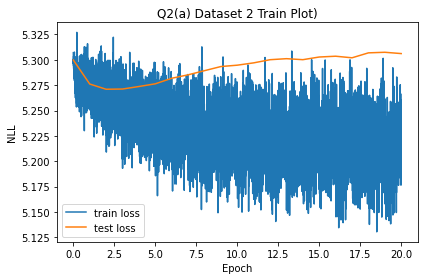

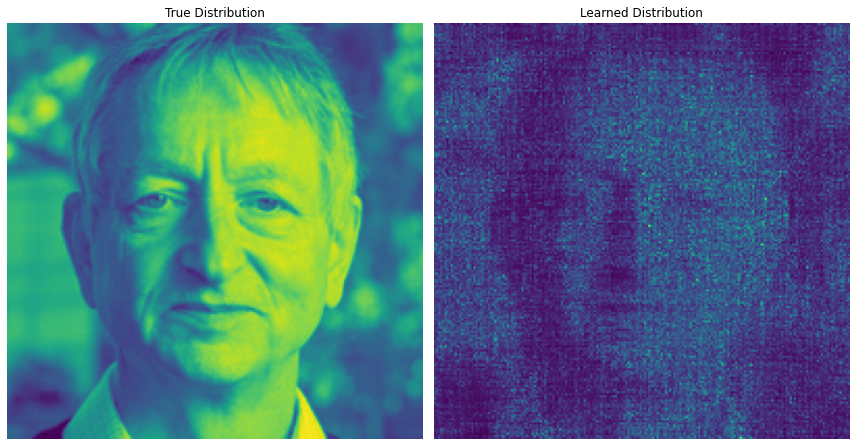

In [ ]:
q2_save_results(2, 'a', q2_a)

## Part (b) Shapes and MNIST
Now, we will work with a higher dimensional datasets, namely a shape dataset and MNIST. Run the cell below to visualize the two datasets

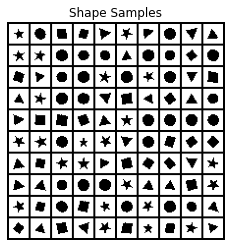

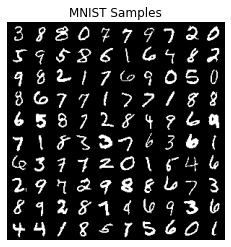

In [ ]:
visualize_q2b_data(1)
visualize_q2b_data(2)

Implement and train a MADE model on the given binary image datasets. Given some binary image of height $H$ and width $W$, we can represent image $x\in \{0, 1\}^{H\times W}$ as a flattened binary vector $x\in \{0, 1\}^{HW}$ to input into MADE to model $p_\theta(x) = \prod_{i=1}^{HW} p_\theta(x_i|x_{<i})$. Your model should output logits, after which you could apply a sigmoid over 1 logit, or a softmax over two logits (either is fine).

**You will provide these deliverables**


1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. 100 samples from the final trained model

### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
def q2_b(train_data, test_data, image_shape, dset_id):
  """
  train_data: A (n_train, H, W, 1) uint8 numpy array of binary images with values in {0, 1}
  test_data: An (n_test, H, W, 1) uint8 numpy array of binary images with values in {0, 1}
  image_shape: (H, W), height and width of the image
  dset_id: An identifying number of which dataset is given (1 or 2). Most likely
           used to set different hyperparameters for different datasets

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a numpy array of size (100, H, W, 1) of samples with values in {0, 1}
  """
  
  """ YOUR CODE HERE """

### Results

Once you've implemented `q2_b`, execute the cells below to visualize and save your results



In [ ]:
q2_save_results(1, 'b', q2_b)

TypeError: ignored

In [ ]:
q2_save_results(2, 'b', q2_b)

# Question 3 PixelCNNs

Now, you will train more powerful PixleCNN models on the shapes dataset and MNIST. In addition, we will extend to modelling colored datasets with and without channel conditioning.



## Part (a) PixelCNN on Shapes and MNIST
In this part, implement a simple PixelCNN architecture to model binary MNIST and shapes images (same as Q2(b), but with a PixelCNN).

We recommend the following network design:
* A $7 \times 7$ masked type A convolution
* $5$ $7 \times 7$ masked type B convolutions
* $2$ $1 \times 1$ masked type B convolutions
* Appropriate ReLU nonlinearities in-between
* 64 convolutional filters

And the following hyperparameters:
* Batch size 128
* Learning rate $10^{-3}$
* 10 epochs
* Adam Optimizer (this applies to all PixelCNN models trained in future parts)

Your model should output logits, after which you could apply a sigmoid over 1 logit, or a softmax over two logits (either is fine). It may also help to scale your input to $[-1, 1]$ before running it through the network. 

Training on the shapes dataset should be quick, and MNIST should take around 10 minutes

**You will provide these deliverables**


1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. 100 samples from the final trained model



### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
kernel_size = 7
mask_type='B'
c = 2+(mask_type=='B')
print(c)

3


In [ ]:
filters = torch.randn(8,3,3,3) # filters of shape (out_channel, in_channels/group, kH, kW)
inputs = torch.randn(2,3,5,5) #(minibatch,in_channels,iH,iW)
output = F.conv2d(inputs, filters, padding=1)
print(output.shape)
print((output.shape[:-1] + (3, -1)))

torch.Size([2, 8, 5, 5])
torch.Size([2, 8, 5, 3, -1])


In [ ]:
class MaskedCNN(nn.Conv2d):
  def __init__(self,mask_type,*args, conditional_size=None, 
               color_conditioning=False,**kwargs):
    assert mask_type in ('A','B')
    super().__init__(*args,**kwargs)

    self.register_buffer('mask',torch.zeros_like(self.weight))
    self.color_conditioning = color_conditioning
    self.create_mask(mask_type)
    self.conditional_size = conditional_size

    if self.conditional_size:
      # conditional_size[0] = 4 classes
      if len(self.conditional_size) == 1:
        self.cond_op = nn.Linear(conditional_size[0], self.out_channels) #(cond_op): Linear(in_features=4, out_features=64, bias=True)
      else:
        self.cond_op = nn.Conv2d(conditional_size[0], self.out_channels,
                                 kernel_size=3, padding=1)
  
  def forward(self,x,idx=0,cond=None):
    batch_size = x.shape[0]
    # print('DEBUG type of input: ',x.shape)
    x  = x.to(dtype=torch.float32)
    out = F.conv2d(x,self.mask*self.weight,self.bias,self.stride,self.padding,self.dilation,self.groups)

    if self.conditional_size:
      if len(self.conditional_size) == 1:
        # Broadcast across height and width of image and add as conditional bias
        # DEBUG type of input:  torch.Size([128, 1, 20, 20])
        # DEBUG in maskedCNN, out in layer 0 has shape: torch.Size([128, 64, 20, 20]) cond_op: torch.Size([128, 64])
        # cond: torch.Size([128,4]) one hot, 4 classes, theses classes has influenced the output over 64 channel
        out_cond_op = self.cond_op(cond).view(batch_size, -1, 1, 1)
        # print('Debug out from layer:{}, and output from maskedcnn:{} cond_op:{}'.format(idx,out[1,1,1,1],out_cond_op[1,1,0,0]))
        out = out + out_cond_op
      else:
        out = out + self.cond_op(cond)
    return out 

  
  def create_mask(self, mask_type):
    # Mask of shape (out_channel, in_channels/group, kH, kW)
    k = self.kernel_size[0]
    self.mask[:, :, :k // 2] = 1
    self.mask[:, :, k // 2, :k // 2] = 1

    if self.color_conditioning:
      assert self.in_channels % 3 == 0 and self.out_channels % 3 == 0
      one_third_in, one_third_out = self.in_channels // 3, self.out_channels // 3
      if mask_type == 'B':
        self.mask[:one_third_out, :one_third_in, k // 2, k // 2] = 1 
        # ví dụ có tổng cộng 120 filter_out, 9 channels_in, thi` 30 filter_out dau tien sẻ đọc 3 channels_in, 
        # filters_out 31 đến 60 đọc 6 channels_in vì theo type B,
        # filter_out từ 61 đến 90 đọc hết 9 channels_in
        self.mask[one_third_out:2*one_third_out, :2*one_third_in, k // 2, k // 2] = 1
        self.mask[2*one_third_out:, :, k // 2, k // 2] = 1
      else:
        self.mask[one_third_out:2*one_third_out, :one_third_in, k // 2, k // 2] = 1
        self.mask[2*one_third_out:, :2*one_third_in, k // 2, k // 2] = 1
    else:
      if mask_type == 'B':
        self.mask[:, :, k // 2, k // 2] = 1

class ResBlock(nn.Module):
  def __init__(self, in_channels, **kwargs):
    super().__init__()
    self.block = nn.ModuleList([nn.ReLU(),
                                MaskedCNN('B',in_channels,in_channels//2,1,**kwargs), # 1x1 Masked Conv
                                nn.ReLU(),
                                #  So e.g. k//2 for odd kernel sizes k with default stride and dilation.
                                MaskedCNN('B',in_channels//2,in_channels//2,7,padding=3,**kwargs), # padding = 3 is 'same' padding
                                nn.ReLU(),
                                MaskedCNN('B',in_channels//2,in_channels,1,**kwargs)])

  def forward(self, x, cond=None):
   out = x 
   for layer in self.block:
     if isinstance(layer,MaskedCNN):
       out = layer(out,cond)
     else: out = layer(out)
   return out + x 

class LayerNorm(nn.LayerNorm):
  def __init__(self, color_conditioning, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.color_conditioning = color_conditioning

  def forward(self, x):
    x = x.permute(0, 2, 3, 1).contiguous()
    x_shape = x.shape
    if self.color_conditioning:
      x = x.contiguous().view(*(x_shape[:-1] + (3, -1)))
    # print('Debug x shape:',x.shape)
    x = super().forward(x)
    if self.color_conditioning:
      x = x.view(*x_shape)
    return x.permute(0, 3, 1, 2).contiguous()

class BatchNorm(nn.BatchNorm2d):
  def __init__(self, color_conditioning, *args, **kwargs):
    super().__init__(*args, **kwargs)
    self.color_conditioning = color_conditioning

  def forward(self, x):
    x_shape = x.shape
    if self.color_conditioning:
      x = x.contiguous().view(*(x_shape[:-1] + (3, -1)))
    x = super().forward(x)
    if self.color_conditioning:
      x = x.view(*x_shape)
    return x

class PixelCNN_BUG(nn.Module):
  def __init__(self, input_shape, n_colors=1, kernel_size=7, n_filters=64, n_layers=5,
               conditional_size=None, use_resblock=False, color_conditioning=False,**kwargs):
    super().__init__()
    self.input_shape = input_shape
    self.n_colors = n_colors
    self.n_channels = input_shape[0]
    self.conditional_size = conditional_size
    self.color_conditioning = color_conditioning

    kwargs = dict(conditional_size=conditional_size, 
                  color_conditioning=color_conditioning)
    if use_resblock:
      block_init = lambda: ResBlock(n_filters, **kwargs)
    else:    
      block_init = lambda: MaskedCNN('B', n_filters, n_filters, 
                                      kernel_size=kernel_size,
                                      padding=kernel_size // 2, **kwargs)

    # #1,64,7,3
    # model = [MaskedCNN('A', n_channels, n_filters, kernel_size = kernel_size, padding=kernel_size//2,**kargs),nn.ReLU()]
    # for _ in range(n_layers_B[0]): #5
    #   model.extend([MaskedCNN('B',n_filters,n_filters,kernel_size=kernel_size,padding=kernel_size//2,**kargs),nn.ReLU()]) #64,64,7,3
    # model.extend([MaskedCNN('B',n_filters,n_filters,1)])
    # model.extend([nn.ReLU(),MaskedCNN('B', n_filters, n_colors*n_channels, 1)])
    # self.net = nn.Sequential(*model)
    model = nn.ModuleList([MaskedCNN('A', self.n_channels, n_filters, 
                                      kernel_size=kernel_size,
                                      padding=kernel_size // 2, **kwargs)])

    if conditional_size:
      if len(conditional_size) == 1:
        self.cond_op = lambda x: x # No preprocessing conditional if one hot
      else:
        # For Grayscale PixelCNN (some preprocessing on the binary image)
        self.cond_op = nn.Sequential(
            nn.Conv2d(1, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, 3, padding=1),
            nn.ReLU()
        )

    for _ in range(n_layers):
      if color_conditioning:
        model.append(LayerNorm(color_conditioning, n_filters // 3))
      else:
        model.append(LayerNorm(color_conditioning, n_filters))
      model.extend([nn.ReLU(), block_init()]) #extend not using the whole object
    model.extend([nn.ReLU(), MaskedCNN('B', n_filters, n_filters, 1, **kwargs)])
    model.extend([nn.ReLU(), MaskedCNN('B', n_filters, n_colors * self.n_channels, 1, **kwargs)])

    self.net = model
    
  def forward(self, x, cond=None):
    batch_size = x.shape[0]
    out = (x.float() / (self.n_colors - 1) - 0.5) / 0.5
    if self.conditional_size:
      cond = self.cond_op(cond)
      # print('DEBUG cond:',cond)
      # print('DEBUG cond size:',self.conditional_size)
    for idx,layer in enumerate(self.net):
      if isinstance(layer, MaskedCNN) or isinstance(layer, ResBlock):
        # print('DEBUG cond: ',cond.shape) torch.Size([128, 4])
        out = layer(out, idx, cond=cond)
      else:
        out = layer(out)

    if self.color_conditioning:
      # print('DEBUG out shape:',out.shape)
      # output from self.net has shape: (batch_size,n_channels*n_colors,high,width) (128,12,20,20)
      # input_shape: (C,H,W)
      return out.view(batch_size, self.n_channels, self.n_colors, 
                      *self.input_shape[1:]).permute(0, 2, 1, 3, 4)
    else:
      # print('DEBUG out shape:',out.shape)
      return out.view(batch_size, self.n_colors, *self.input_shape)


  def negative_log_likelihood(self,input,cond=None):
    logits = self(input,cond)
    # print('DEBUG LOGITS shape :{}, input shape:{}'.format(logits.shape, input.shape))
    # logits' shape: (batch_size,n_colors,n_channels,high,width) (128,4,3,20,20)
    # input's shape: (batch_size,n_channels,high,width)
    # assert logits.shape==input.shape
    return F.cross_entropy(logits, input.long())

  def sample(self,num_samples,cond=None):
    s = torch.zeros(num_samples,*self.input_shape).cuda()
    with torch.no_grad():
      for h in range(self.input_shape[1]):
        for w in range(self.input_shape[2]):
          for k in range(self.n_channels):
            logits = self(s,cond=cond)[:,:,k,h,w]
            probs = F.softmax(logits,dim=1) #softmax over colors channel
            s[:, k, h, w] = torch.multinomial(probs, 1).squeeze(-1)
    return s.permute(0, 2, 3, 1).cpu().numpy()

In [ ]:
def q3_a(train_data, test_data, image_shape, dset_id):
  """
  train_data: A (n_train, H, W, 1) uint8 numpy array of binary images with values in {0, 1}
  test_data: A (n_test, H, W, 1) uint8 numpy array of binary images with values in {0, 1}
  image_shape: (H, W), height and width of the image
  dset_id: An identifying number of which dataset is given (1 or 2). Most likely
           used to set different hyperparameters for different datasets

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a numpy array of size (100, H, W, 1) of samples with values in {0, 1}
  """
  
  """ YOUR CODE HERE """
  train_data = np.transpose(train_data, (0, 3, 1, 2))
  test_data = np.transpose(test_data, (0, 3, 1, 2))

  H, W = image_shape
  # model = PixelCNN((1, H, W), 2, n_layers=5).cuda()
  model = PixelCNN_BUG((1, H, W), n_colors = 2).cuda()
  print(model)
  train_loader = data.DataLoader(train_data, batch_size=128, shuffle=True)
  test_loader = data.DataLoader(test_data, batch_size=128)
  train_losses, test_losses = train_solver(model, train_loader, test_loader, 
                                           dict(epochs=10, lr=1e-3))
  samples = model.sample(100)
  return train_losses, test_losses, samples

### Results

Once you've implemented `q3_a`, execute the cells below to visualize and save your results



PixelCNN_BUG(
  (net): ModuleList(
    (0): MaskedCNN(1, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (2): ReLU()
    (3): MaskedCNN(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (4): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (5): ReLU()
    (6): MaskedCNN(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (7): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (8): ReLU()
    (9): MaskedCNN(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (10): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (11): ReLU()
    (12): MaskedCNN(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (13): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (14): ReLU()
    (15): MaskedCNN(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (16): ReLU()
    (17): MaskedCNN(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (18): ReLU()
    (

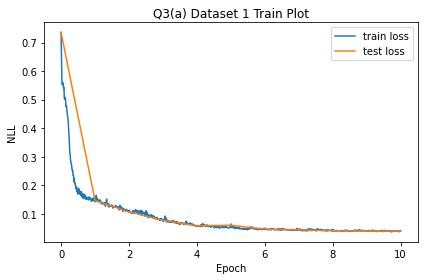

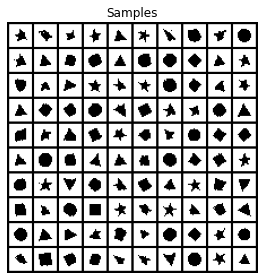

In [ ]:
q3a_save_results(1, q3_a)

PixelCNN_BUG(
  (net): ModuleList(
    (0): MaskedCNN(1, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (2): ReLU()
    (3): MaskedCNN(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (4): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (5): ReLU()
    (6): MaskedCNN(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (7): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (8): ReLU()
    (9): MaskedCNN(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (10): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (11): ReLU()
    (12): MaskedCNN(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (13): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (14): ReLU()
    (15): MaskedCNN(64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (16): ReLU()
    (17): MaskedCNN(64, 64, kernel_size=(1, 1), stride=(1, 1))
    (18): ReLU()
    (

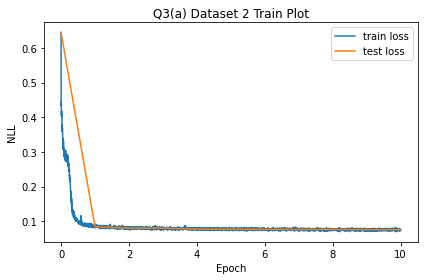

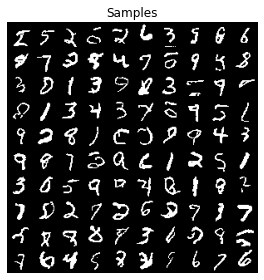

In [ ]:
q3a_save_results(2, q3_a)

## Part (b) PixelCNN on Colored Shapes and MNIST: Independent Color Channels

For the next two parts, we'll work with color images (shapes and MNIST). Run the cell below to visualize the dataset.

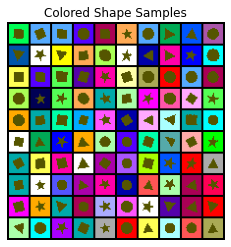

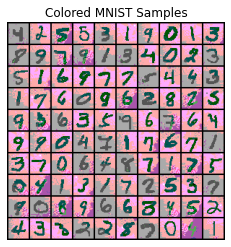

In [ ]:
visualize_q3b_data(1)
visualize_q3b_data(2)

Now, implement a PixelCNN to support RGB color channels (or augment your existing implementation). **First, implement a PixelCNN that assumes color channels as independent.** More formally, we model the following parameterized distribution:

$$p_\theta(x) = \prod_{i=1}^{HW}\prod_{c=1}^C p_\theta(x_i^c | x_{<i})$$

Here are some tips that you may find useful for designing and training these models:
* You will need a 4-way softmax for every prediction, as opposed to a 256-way softmax in the PixelCNN paper, since the dataset is quantized to two bits per color channel
* You can set number of filters for each convolutions to 120. You can use the ReLU nonlinearity throughout.
* Use a stack of 8 residual block architecture from [Figure 5](https://arxiv.org/abs/1601.06759) but with 7 x 7 masked convolutions in the middle instead of 3 x 3 masked convolutions
* Consider using [layer normalization](https://arxiv.org/abs/1607.06450) to improve performance. However, be careful to maintain the autoregressive property.
* With a learning rate of $10^{-3}$ and a batch size of 128, it should take a few minutes to run on the shapes dataset, and about 50-60 minutes on MNIST.

**You will provide these deliverables**


1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. 100 samples from the final trained model



### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
def q3_b(train_data, test_data, image_shape, dset_id):
  """
  train_data: A (n_train, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
  test_data: A (n_test, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
  image_shape: (H, W, C), height, width, and # of channels of the image
  dset_id: An identifying number of which dataset is given (1 or 2). Most likely
           used to set different hyperparameters for different datasets

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a numpy array of size (100, H, W, C) of samples with values in {0, 1, 2, 3}
  """
  train_data = np.transpose(train_data, (0, 3, 1, 2))
  test_data = np.transpose(test_data, (0, 3, 1, 2))

  H, W, C = image_shape
  if dset_id == 1:
    model = PixelCNN_BUG((C, H, W), n_colors= 4, n_filters=120, n_layers=8, use_resblock=True).cuda()
    train_args = dict(epochs=15, lr=1e-3, grad_clip=1)
    print(model)
  else:
    model = PixelCNN_BUG((C, H, W), n_colors= 4, n_filters=120, n_layers=8, use_resblock=True).cuda()
    train_args=dict(epochs=15, lr=1e-3, grad_clip=1)
    print(model)

  train_loader = data.DataLoader(train_data, batch_size=128, shuffle=True)
  test_loader = data.DataLoader(test_data, batch_size=128)
  train_losses, test_losses = train_solver(model, train_loader, test_loader, 
                                           train_args)
  samples = model.sample(100)
  return train_losses, test_losses, samples
  """ YOUR CODE HERE """

### Results

Once you've implemented `q3_b`, execute the cells below to visualize and save your results



PixelCNN_BUG(
  (net): ModuleList(
    (0): MaskedCNN(3, 120, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): LayerNorm((120,), eps=1e-05, elementwise_affine=True)
    (2): ReLU()
    (3): ResBlock(
      (block): ModuleList(
        (0): ReLU()
        (1): MaskedCNN(120, 60, kernel_size=(1, 1), stride=(1, 1))
        (2): ReLU()
        (3): MaskedCNN(60, 60, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
        (4): ReLU()
        (5): MaskedCNN(60, 120, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (4): LayerNorm((120,), eps=1e-05, elementwise_affine=True)
    (5): ReLU()
    (6): ResBlock(
      (block): ModuleList(
        (0): ReLU()
        (1): MaskedCNN(120, 60, kernel_size=(1, 1), stride=(1, 1))
        (2): ReLU()
        (3): MaskedCNN(60, 60, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
        (4): ReLU()
        (5): MaskedCNN(60, 120, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (7): LayerNorm((120,), eps=1e-05, elementwise_affine=

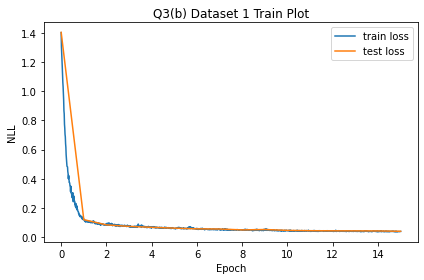

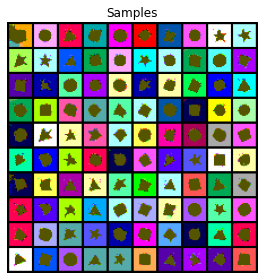

In [ ]:
q3bc_save_results(1, 'b', q3_b)

In [ ]:
q3bc_save_results(2, 'b', q3_b)

PixelCNN_BUG(
  (net): ModuleList(
    (0): MaskedCNN(3, 120, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): LayerNorm((120,), eps=1e-05, elementwise_affine=True)
    (2): ReLU()
    (3): ResBlock(
      (block): ModuleList(
        (0): ReLU()
        (1): MaskedCNN(120, 60, kernel_size=(1, 1), stride=(1, 1))
        (2): ReLU()
        (3): MaskedCNN(60, 60, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
        (4): ReLU()
        (5): MaskedCNN(60, 120, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (4): LayerNorm((120,), eps=1e-05, elementwise_affine=True)
    (5): ReLU()
    (6): ResBlock(
      (block): ModuleList(
        (0): ReLU()
        (1): MaskedCNN(120, 60, kernel_size=(1, 1), stride=(1, 1))
        (2): ReLU()
        (3): MaskedCNN(60, 60, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
        (4): ReLU()
        (5): MaskedCNN(60, 120, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (7): LayerNorm((120,), eps=1e-05, elementwise_affine=

KeyboardInterrupt: ignored

## Part (c) PixelCNN on Colored Shapes and MNIST: Autoregressive Color Channels

Now, implement a PixelCNN that models **dependent** color channels. Formally, we model the parameterized distribution

$$p_\theta(x) = \prod_{i=1}^{HW}\prod_{c=1}^C p_\theta(x_i^c | x_i^{<c}, x_{<i})$$

To do so, change your masking scheme for the center pixel. Split the filters into 3 groups, only allowing each group to see the groups before (or including the current group, for type B masks) to maintain the autoregressive property.

Training times and hyperparameter settings should be the same as part (b).

**You will provide these deliverables**


1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. 100 samples from the final trained model



### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
def q3_c(train_data, test_data, image_shape, dset_id):
  """
  train_data: A (n_train, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
  test_data: A (n_test, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
  image_shape: (H, W, C), height, width, and # of channels of the image
  dset_id: An identifying number of which dataset is given (1 or 2). Most likely
           used to set different hyperparameters for different datasets

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a numpy array of size (100, H, W, C) of samples with values in {0, 1, 2, 3}
  """
  
  """ YOUR CODE HERE """
  train_data = np.transpose(train_data, (0, 3, 1, 2))
  test_data = np.transpose(test_data, (0, 3, 1, 2))

  H, W, C = image_shape
  if dset_id == 1:
    model = PixelCNN_BUG((C, H, W), n_colors= 4, n_filters=120, n_layers=8, use_resblock=True,color_conditioning=True).cuda()
    train_args = dict(epochs=15, lr=1e-3, grad_clip=1)
    print(model)
  else:
    model = PixelCNN_BUG((C, H, W), n_colors= 4, n_filters=120, n_layers=8, use_resblock=True,color_conditioning=True).cuda()
    train_args=dict(epochs=15, lr=1e-3, grad_clip=1)
    print(model)

  train_loader = data.DataLoader(train_data, batch_size=128, shuffle=True)
  test_loader = data.DataLoader(test_data, batch_size=128)
  train_losses, test_losses = train_solver(model, train_loader, test_loader, 
                                           train_args)
  samples = model.sample(100)
  return train_losses, test_losses, samples

### Results

Once you've implemented `q3_c`, execute the cells below to visualize and save your results



PixelCNN_BUG(
  (net): ModuleList(
    (0): MaskedCNN(3, 120, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): LayerNorm((40,), eps=1e-05, elementwise_affine=True)
    (2): ReLU()
    (3): ResBlock(
      (block): ModuleList(
        (0): ReLU()
        (1): MaskedCNN(120, 60, kernel_size=(1, 1), stride=(1, 1))
        (2): ReLU()
        (3): MaskedCNN(60, 60, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
        (4): ReLU()
        (5): MaskedCNN(60, 120, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (4): LayerNorm((40,), eps=1e-05, elementwise_affine=True)
    (5): ReLU()
    (6): ResBlock(
      (block): ModuleList(
        (0): ReLU()
        (1): MaskedCNN(120, 60, kernel_size=(1, 1), stride=(1, 1))
        (2): ReLU()
        (3): MaskedCNN(60, 60, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
        (4): ReLU()
        (5): MaskedCNN(60, 120, kernel_size=(1, 1), stride=(1, 1))
      )
    )
    (7): LayerNorm((40,), eps=1e-05, elementwise_affine=Tru

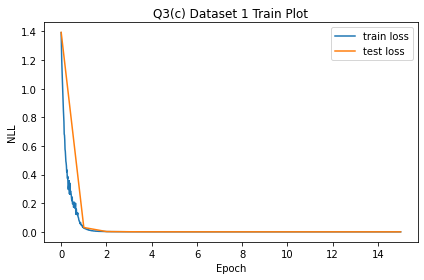

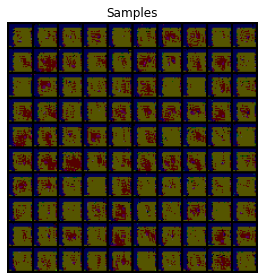

In [ ]:
q3bc_save_results(1, 'c', q3_c)

In [ ]:
q3bc_save_results(2, 'c', q3_c)

## Part (d) Conditional PixelCNNs

In this part, implement and train a **class-conditional** PixelCNN on binary MNIST. Condition on a class label by adding a conditional bias in each convolutional layer. More precisely, in the $\ell$th convolutional layer, compute: 
$$W_\ell * x + b_\ell + V_\ell y$$
where $W_\ell * x + b_\ell$ is a masked convolution (as in previous parts), $V$ is a 2D weight matrix, and $y$ is a one-hot encoding of the class label (where the conditional bias is broadcasted spacially and added channel-wise).

You can use a PixelCNN architecture similar to part (a). Training on the shapes dataset should be quick, and MNIST should take around 10-15 minutes


**You will provide these deliverables**


1.   Over the course of training, record the average negative log-likelihood (nats / dim) of the training data (per minibatch) and test data (for your entire test set). Code is provided that automatically plots the training curves. 
2.   Report the final test set performance of your final model
3. 100 samples from the final trained model

### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
import torch
import torch.optim as optim
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
class SimpleDataset(data.Dataset):
  def __init__(self, x, y):
    super().__init__()
    self.x = x
    self.y = y

  def __len__(self):
    return len(self.x)

  def __getitem__(self, index):
    return self.x[index], self.y[index]

def train(model, train_loader, optimizer):
  model.train()
  train_losses = []
  for x, y in train_loader:
    x = x.cuda()
    y = y.cuda()
    loss = model.negative_log_likelihood(x, cond=y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
  return train_losses


def eval_loss(model, data_loader):
  model.eval()
  total_loss = 0
  with torch.no_grad():
    for x, y in data_loader:
      x = x.cuda()
      y = y.cuda()
      loss = model.negative_log_likelihood(x, cond=y)
      total_loss += loss * x.shape[0]
    avg_loss = total_loss / len(data_loader.dataset)
  return avg_loss.item()


def train_epochs(model, train_loader, test_loader, train_args):
  epochs, lr = train_args['epochs'], train_args['lr']
  optimizer = optim.Adam(model.parameters(), lr=lr)

  train_losses = []
  test_losses = [eval_loss(model, test_loader)]
  for epoch in range(epochs):
    model.train()

    train_losses.extend(train(model, train_loader, optimizer))
    test_loss = eval_loss(model, test_loader)
    test_losses.append(test_loss)

  return train_losses, test_losses

In [ ]:
def preprocess_dset(data, labels, n_classes):
  data = np.transpose(data, (0, 3, 1, 2))
  labels_oh = np.zeros((len(labels), n_classes))
  labels_oh[np.arange(len(labels)), labels] = 1
  labels_oh = labels_oh.astype('float32')
  return data, labels_oh

In [ ]:
def q3_d(train_data, train_labels, test_data, test_labels, image_shape, n_classes, dset_id):
  """
  train_data: A (n_train, H, W, 1) numpy array of binary images with values in {0, 1}
  train_labels: A (n_train,) numpy array of class labels
  test_data: A (n_test, H, W, 1) numpy array of binary images with values in {0, 1}
  test_labels: A (n_test,) numpy array of class labels
  image_shape: (H, W), height and width
  n_classes: number of classes (4 or 10)
  dset_id: An identifying number of which dataset is given (1 or 2). Most likely
           used to set different hyperparameters for different datasets

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a numpy array of size (100, H, C, 1) of samples with values in {0, 1}
    where an even number of images of each class are sampled with 100 total
  """
  
  """ YOUR CODE HERE """
  train_data, train_labels_oh = preprocess_dset(train_data, train_labels, n_classes)
  test_data, test_labels_oh = preprocess_dset(test_data, test_labels, n_classes)

  H, W = image_shape
  model = PixelCNN_BUG((1, H, W), 2, conditional_size=(n_classes,)).cuda()
  print(model)
  train_loader = data.DataLoader(SimpleDataset(train_data, train_labels_oh), 
                                 batch_size=128, shuffle=True)
  test_loader = data.DataLoader(SimpleDataset(test_data, test_labels_oh), batch_size=128)
  train_losses, test_losses = train_epochs(model, train_loader, test_loader, 
                                           dict(epochs=10, lr=1e-3))

  cond = torch.arange(n_classes).unsqueeze(1).repeat(1, 100 // n_classes).view(-1).long()
  one_hot = torch.FloatTensor(cond.shape[0], n_classes)
  one_hot.zero_()
  one_hot.scatter_(1, cond.unsqueeze(1), 1)
  one_hot = one_hot.cuda()

  samples = model.sample(100, cond=one_hot)
  
  return train_losses, test_losses, samples

### Results

Once you've implemented `q3_d`, execute the cells below to visualize and save your results



In [ ]:
!nvidia-smi

Sun May  9 05:35:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    27W /  70W |   1646MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

PixelCNN_BUG(
  (net): ModuleList(
    (0): MaskedCNN(
      1, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3)
      (cond_op): Linear(in_features=4, out_features=64, bias=True)
    )
    (1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (2): ReLU()
    (3): MaskedCNN(
      64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3)
      (cond_op): Linear(in_features=4, out_features=64, bias=True)
    )
    (4): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (5): ReLU()
    (6): MaskedCNN(
      64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3)
      (cond_op): Linear(in_features=4, out_features=64, bias=True)
    )
    (7): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (8): ReLU()
    (9): MaskedCNN(
      64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3)
      (cond_op): Linear(in_features=4, out_features=64, bias=True)
    )
    (10): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (11): ReLU()
    (12): MaskedCNN(
   

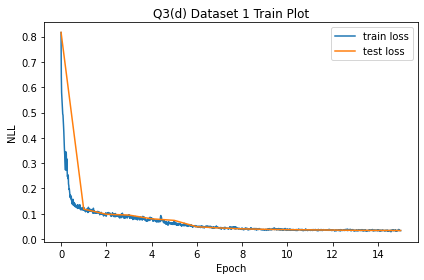

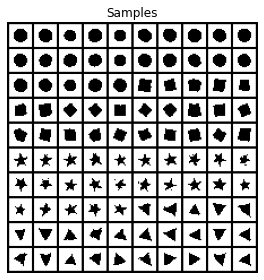

In [ ]:
q3d_save_results(1, q3_d)

PixelCNN_BUG(
  (net): ModuleList(
    (0): MaskedCNN(
      1, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3)
      (cond_op): Linear(in_features=10, out_features=64, bias=True)
    )
    (1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (2): ReLU()
    (3): MaskedCNN(
      64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3)
      (cond_op): Linear(in_features=10, out_features=64, bias=True)
    )
    (4): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (5): ReLU()
    (6): MaskedCNN(
      64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3)
      (cond_op): Linear(in_features=10, out_features=64, bias=True)
    )
    (7): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (8): ReLU()
    (9): MaskedCNN(
      64, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3)
      (cond_op): Linear(in_features=10, out_features=64, bias=True)
    )
    (10): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    (11): ReLU()
    (12): MaskedCNN(

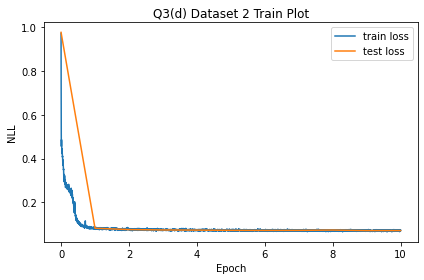

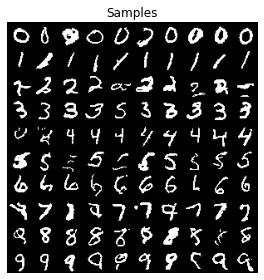

In [ ]:
q3d_save_results(2, q3_d)

# Question 4: Bonus Questions (Optional)

## Part (a) Gated PixelCNN
Implement a [Gated PixelCNN](https://arxiv.org/abs/1606.05328) to fix the blind-spot issue, and report training curves, final test loss, and samples.

### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
import torch
import torch.optim as optim
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm

quiet = True

def train(model, train_loader, optimizer, epoch, grad_clip=None):
  model.train()  
  if not quiet:
    pbar = tqdm(total=len(train_loader.dataset))
  train_losses = []
  for x in train_loader:
    x = x.cuda().contiguous()
    
    #1
    loss = model.loss(x)
    #2
    optimizer.zero_grad()
    #3
    loss.backward()

    if grad_clip:
      torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)

    #4
    optimizer.step()
    #5
    train_losses.append(loss.item())
    if not quiet:
      pbar.set_description(f'Epoch {epoch}, Train Loss {np.mean(train_losses[-50:]):.4f}')
      pbar.update(x.shape[0])
  if not quiet:
    pbar.close()
  return train_losses

def eval_loss(model, data_loader):
  model.eval()
  total_loss = 0
  with torch.no_grad():
    for x in data_loader:
      x = x.cuda().contiguous()
      total_loss += model.loss(x)*x.shape[0]
    average_loss = total_loss/len(data_loader.dataset)
  return average_loss.item()


def train_epochs(model, train_loader, test_loader, train_args):
  epochs, lr = train_args['epochs'], train_args['lr']
  grad_clip = train_args.get('grad_clip', None)

  optimizer = optim.Adam(model.parameters(), lr=lr)
  train_losses = []
  test_losses = [eval_loss(model,test_loader)]
  for epoch in range(epochs):
    model.train()
    #1
    train_loss = [train(model,train_loader,optimizer,epoch,grad_clip)]
    train_losses.extend(train_loss)
    #2
    test_loss = eval_loss(model,test_loader)
    test_losses.append(test_loss)

    if not quiet:
          print(f'Epoch {epoch}, Test loss {test_loss:.4f}')

  return train_losses, test_losses

In [ ]:
import torch
import torch.optim as optim
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm

quiet = True

def train(model, train_loader, optimizer, epoch, grad_clip=None):
  model.train()
  
  if not quiet:
    pbar = tqdm(total=len(train_loader.dataset))
  train_losses = []
  for x in train_loader:
    x = x.cuda().contiguous()
    # 1
    loss = model.loss(x)
    # 2
    optimizer.zero_grad()
    # 3
    loss.backward()
    if grad_clip:
      torch.nn.utils.clip_grad_norm_(model.parameters(), grad_clip)
    # 4
    optimizer.step()
    train_losses.append(loss.item())

    if not quiet:
      pbar.set_description(f'Epoch {epoch}, Train Loss {np.mean(train_losses[-50:]):.4f}')
      pbar.update(x.shape[0])
  if not quiet:
    pbar.close()
  return train_losses

def eval_loss(model, data_loader):
  model.eval()
  total_loss = 0
  with torch.no_grad():
    for x in data_loader:
      x = x.cuda().contiguous()
      loss = model.loss(x)
      total_loss += loss * x.shape[0]
    avg_loss = total_loss / len(data_loader.dataset)

  return avg_loss.item()


def train_epochs(model, train_loader, test_loader, train_args):
  epochs, lr = train_args['epochs'], train_args['lr']
  grad_clip = train_args.get('grad_clip', None)
  optimizer = optim.Adam(model.parameters(), lr=lr)

  train_losses = []
  test_losses = [eval_loss(model, test_loader)]
  for epoch in range(epochs):
    model.train()
    # 1
    train_losses.extend(train(model, train_loader, optimizer, epoch, grad_clip))
    # 2
    test_loss = eval_loss(model, test_loader)
    test_losses.append(test_loss)
    if not quiet:
      print(f'Epoch {epoch}, Test loss {test_loss:.4f}')

  return train_losses, test_losses

In [ ]:
class StackedLayerNorm(nn.Module):
  def __init__(self,n_filters):
    super().__init__()
    self.h_layer_norm = LayerNorm(False,n_filters)
    self.v_layer_norm = LayerNorm(False,n_filters)

  def forward(self,x):
    vx,hx = x.chunk(2,dim=1)
    hx_norm, vx_norm = self.h_layer_norm(hx),self.v_layer_norm(vx)
    return torch.cat((vx_norm,hx_norm),dim=1)

class GatedCNN(nn.Module):
  def __init__(self, mask_type, k, in_channels, out_channels, padding = 3):
    super().__init__()
    # create Conv2d for vertical and horizontal mask
    self.vertical_mask = nn.Conv2d(in_channels,2*out_channels,kernel_size=k,padding=padding,bias=False)
    self.horizontal_mask = nn.Conv2d(in_channels,2*out_channels,kernel_size=(1,k),padding=(0,padding),bias=False)

    # vertical and horizontal one hot ????
    self.vertical_onehot = nn.Conv2d(2*out_channels,2*out_channels,kernel_size=1,bias=False)
    self.horizontal_onehot = nn.Conv2d(out_channels,out_channels,kernel_size=1,bias=False)
    # If you have parameters in your model, which should be saved and restored in the state_dict, 
    # but not trained by the optimizer, you should register them as buffers.
    # Buffers won’t be returned in model.parameters(), so that the optimizer won’t have a change to update them.
    # self.register_buffer('vmask',torch.ones_like(self.vertical_mask.weight))
    # self.register_buffer('hmask',torch.ones_like(self.horizontal_mask.weight))

    self.register_buffer('vmask', self.vertical_mask.weight.data.clone())
    self.register_buffer('hmask', self.horizontal_mask.weight.data.clone())

    self.vmask.fill_(1)
    self.hmask.fill_(1)

    self.vmask[:,:,k//2+1:] = 0
    self.vmask[:,:,:,k//2+1:] = 0
    if mask_type == 'A':
      self.vmask[:,:,:,k//2] = 0  
  
  def down_shift(self, x):
    x = x[:, :, :-1, :]
    #(padding_left ,padding_right ,padding_top ,padding_bottom)
    pad = nn.ZeroPad2d((0, 0, 1, 0))
    return pad(x)

  def forward(self,x):
    vx,hx = x.chunk(2,dim=1)
    self.vertical_mask.weight.data *= self.vmask
    self.horizontal_mask.weight.data *= self.hmask

    vx = self.vertical_mask(vx)
    hx_new = self.horizontal_mask(hx)

    #Allow horizontal stack to see info from vertical stack
    hx_new = hx_new + self.vertical_onehot(self.down_shift(vx))

    vx1,vx2 = vx.chunk(2,dim=1)
    vx = torch.tanh(vx1) + torch.sigmoid(vx2)
    
    hx1,hx2 = hx_new.chunk(2,dim=1)
    hx_new = torch.tanh(hx1) + torch.sigmoid(hx2)
    hx_new = self.horizontal_onehot(hx_new)
    hx = hx + hx_new

    return torch.cat((vx,hx),dim=1)

class GatedPixelCNN(nn.Module):
  def __init__(self, input_shape, n_colors, kernel_size=7, n_layers=8, n_filters=64):
    super().__init__()
    self.in_channels = input_shape[0]
    self.n_colors = n_colors
    self.input_shape = input_shape

    self.in_conv = MaskedCNN('A', self.in_channels, n_filters, kernel_size = kernel_size, padding=kernel_size//2)
    model = []
    for _ in range(n_layers-2):
      model.extend([nn.ReLU(), GatedCNN('B',kernel_size,n_filters,n_filters,padding=kernel_size//2)])
      #model.append(StackedLayerNorm(n_filters))
      model.extend([StackedLayerNorm(n_filters)])
    
    self.out_conv = MaskedCNN('B',n_filters,self.n_colors*self.in_channels,kernel_size = kernel_size,padding=kernel_size//2)
    self.net = nn.Sequential(*model)

  def forward(self,x):
    batch_size = x.shape[0]
    # Normalize x
    out = (x.float() / (self.n_colors - 1) - 0.5) / 0.5
    # print('DEBUG out shape:',out.shape)
    out = self.in_conv(out)
    out = self.net(torch.cat((out, out), dim=1)).chunk(2, dim=1)[1]
    out = self.out_conv(out)  
    return out.view(batch_size, self.in_channels, self.n_colors, *self.input_shape[1:]).permute(0, 2, 1, 3, 4)

  def loss(self, x):
    return F.cross_entropy(self(x), x.long())

  def sample(self, n):
    samples = torch.zeros(n, *self.input_shape).cuda()
    with torch.no_grad():
      for r in range(self.input_shape[1]):
        for c in range(self.input_shape[2]):
          for k in range(self.in_channels):
            logits = self(samples)[:, :, k, r, c]
            probs = F.softmax(logits, dim=1)
            samples[:, k, r, c] = torch.multinomial(probs, 1).squeeze(-1)
    return samples.permute(0, 2, 3, 1).cpu().numpy()

  

In [ ]:
def q4_a(train_data, test_data, image_shape):
  """
  train_data: A (n_train, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
  test_data: A (n_test, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
  image_shape: (H, W, C), height, width, and # of channels of the image

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a numpy array of size (100, H, W, C) of generated samples with values in {0, 1, 2, 3}
  """
  """ YOUR CODE HERE """
  train_data = np.transpose(train_data, (0, 3, 1, 2))
  test_data = np.transpose(test_data, (0, 3, 1, 2))

  H, W, C = image_shape
  model = GatedPixelCNN((C, H, W), 4, n_filters=64, n_layers=8).cuda()
  train_args=dict(epochs=10, lr=1e-3, grad_clip=1)
  print(model)
  train_loader = data.DataLoader(train_data, batch_size=128, shuffle=True)
  test_loader = data.DataLoader(test_data, batch_size=128)
  train_losses, test_losses = train_epochs(model, train_loader, test_loader, 
                                           train_args)
  samples = model.sample(4)
  return train_losses, test_losses, samples

### Results

Once you've implemented `q4_a`, execute the cells below to visualize and save your results



In [ ]:
!nvidia-smi

Mon May 17 04:54:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   69C    P0    33W /  70W |   4812MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

GatedPixelCNN(
  (in_conv): MaskedCNN(3, 64, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (out_conv): MaskedCNN(64, 12, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
  (net): Sequential(
    (0): ReLU()
    (1): GatedCNN(
      (vertical_mask): Conv2d(64, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
      (horizontal_mask): Conv2d(64, 128, kernel_size=(1, 7), stride=(1, 1), padding=(0, 3), bias=False)
      (vertical_onehot): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (horizontal_onehot): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    )
    (2): StackedLayerNorm(
      (h_layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (v_layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
    )
    (3): ReLU()
    (4): GatedCNN(
      (vertical_mask): Conv2d(64, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), bias=False)
      (horizontal_mask): Conv2d(64, 128, kernel_size=(1

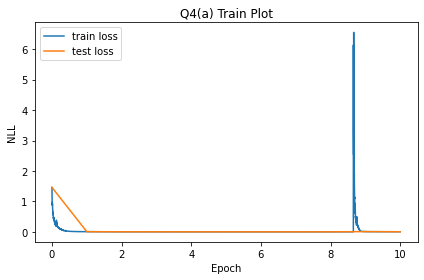

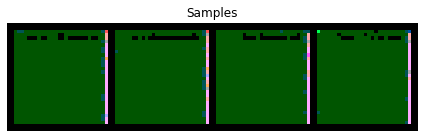

In [ ]:
q4a_save_results(q4_a)

## Part (b) Grayscale PixelcNN
Train a [Grayscale PixelCNN](https://arxiv.org/abs/1612.08185) on Colored MNIST. You do not need to use their architecture - stacking standard masked convolutions or residual blocks is fine. First, generate a binary image, and then the 2-bit color image.

### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
def q4_b(train_data, test_data, image_shape):
  """
  train_data: A (n_train, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
  test_data: A (n_test, H, W, C) uint8 numpy array of color images with values in {0, 1, 2, 3}
  image_shape: (H, W, C), height, width, and # of channels of the image

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a numpy array of size (50, H, W, 1) of generated binary images in {0, 1}
  - a numpy array of size (50, H, W, C) of conditonally generated color images in {0, 1, 2, 3}
  """
  # You will need to generate the binary image dataset from train_data and test_data
  
  """ YOUR CODE HERE """

### Results

Once you've implemented `q4_b`, execute the cells below to visualize and save your results



In [ ]:
q4b_save_results(q4_b)

## Part (c) Parallel Multiscale PixelCNN
One large disadvantage of autoregressive models is their slow sampling speed, since they require one network evaluation per feature. However, there are existing methods which introduce different independence assumptions to allow for parallelism when sampling. Implement a [Parallel PixelCNN](https://arxiv.org/abs/1703.03664) on 56 x 56 MNIST images, with a base size of 7 x 7 and upscaling by a factor of 2. Sampling should be very quick (< 1s). Architectures may vary, but using small PixelCNN implementation similar to previous parts and small ResNets should suffice

### Solution
Fill out the function below and return the necessary arguments. Feel free to create more cells if need be.

In [ ]:
def q4_c(train_data, test_data):
  """
  train_data: A (60000, 56, 56, 1) numpy array of grayscale images with values in {0, 1}
  test_data: A (10000, 56, 56, 1) numpy array of grayscale images with values in {0, 1}
  image_shape: (H, W), height and width

  Returns
  - a (# of training iterations,) numpy array of train_losses evaluated every minibatch
  - a (# of epochs + 1,) numpy array of test_losses evaluated once at initialization and after each epoch
  - a numpy array of size (100, 56, 56, 1) of generated samples with values in {0, 1}
  """
 
  """ YOUR CODE HERE """

### Results

Once you've implemented `q4_c`, execute the cells below to visualize and save your results



In [ ]:
q4c_save_results(q4_c)